In [9]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.io import wavfile
import warnings
import pandas as pd
import csv
from sklearn import linear_model
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
warnings.filterwarnings("ignore")

In [2]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [3]:
file = open('sound.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues pop rock'.split()
for g in genres:
    for filename in os.listdir(f'/Users/jproza/Downloads/genres/{g}'):
        songname = f'/Users/jproza/Downloads/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('sound.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [62]:
data = pd.read_csv('sound.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00093.wav,0.377607,0.065877,570.040355,995.716054,927.651390,0.021697,-350.434662,169.539993,31.811310,...,1.825483,-5.968805,-5.258165,-0.228381,-1.781452,-3.716631,0.178093,2.066088,-2.894162,blues
1,blues.00087.wav,0.336859,0.158033,1441.899257,1870.405400,3082.803607,0.050869,-155.558823,125.645325,1.601122,...,-0.797854,-7.741701,0.415061,-7.024443,3.999646,-6.252542,0.969415,2.026915,-5.737044,blues
2,blues.00050.wav,0.400936,0.182338,1945.533108,2081.878472,4174.593628,0.085791,-82.999718,107.085808,-25.335440,...,12.546020,-9.753734,2.564369,-6.289512,2.995332,-8.715193,-0.331206,-2.982632,0.702881,blues
3,blues.00044.wav,0.390175,0.136321,2278.961252,2375.248703,5198.594860,0.092525,-109.512589,86.921364,-8.594191,...,11.088338,-5.091685,3.976497,-12.861214,12.336756,0.020517,-0.743094,-5.130959,3.297938,blues
4,blues.00078.wav,0.414176,0.258118,2333.510454,2227.399756,4942.594552,0.123820,-2.510370,101.255318,-33.922623,...,12.509908,-13.368965,6.117490,-9.056482,5.043137,-11.329321,3.169690,-4.570640,-4.037941,blues


In [63]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.377607,0.065877,570.040355,995.716054,927.651390,0.021697,-350.434662,169.539993,31.811310,16.683826,...,1.825483,-5.968805,-5.258165,-0.228381,-1.781452,-3.716631,0.178093,2.066088,-2.894162,blues
1,0.336859,0.158033,1441.899257,1870.405400,3082.803607,0.050869,-155.558823,125.645325,1.601122,45.816345,...,-0.797854,-7.741701,0.415061,-7.024443,3.999646,-6.252542,0.969415,2.026915,-5.737044,blues
2,0.400936,0.182338,1945.533108,2081.878472,4174.593628,0.085791,-82.999718,107.085808,-25.335440,57.104511,...,12.546020,-9.753734,2.564369,-6.289512,2.995332,-8.715193,-0.331206,-2.982632,0.702881,blues
3,0.390175,0.136321,2278.961252,2375.248703,5198.594860,0.092525,-109.512589,86.921364,-8.594191,64.489532,...,11.088338,-5.091685,3.976497,-12.861214,12.336756,0.020517,-0.743094,-5.130959,3.297938,blues
4,0.414176,0.258118,2333.510454,2227.399756,4942.594552,0.123820,-2.510370,101.255318,-33.922623,41.525249,...,12.509908,-13.368965,6.117490,-9.056482,5.043137,-11.329321,3.169690,-4.570640,-4.037941,blues


In [64]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)
classes= list(encoder.classes_)

from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(genre_list))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [65]:
path_csv = 'sound.csv'

In [66]:
fd = pd.read_csv(path_csv)

In [67]:
fd.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.375125,0.154374,2347.930237,2400.822578,4986.943446,0.107257,-114.256334,94.335604,-3.562059,34.009414,...,-6.773578,3.039505,-5.360038,0.631704,-4.303087,0.023509,-4.622202,-0.209444,-2.220012,-1.358242
std,0.058827,0.060730,765.638225,559.335558,1690.775031,0.042026,78.099191,28.496364,22.889929,18.413537,...,7.551255,6.007521,6.439158,4.726827,5.151243,4.779795,4.924571,3.926147,4.288366,4.034043
min,0.225680,0.037566,570.040355,995.716054,927.651390,0.021697,-350.434662,32.330730,-55.807491,-18.727547,...,-28.057501,-15.796446,-27.523129,-12.594489,-17.539125,-15.693846,-17.234728,-11.963694,-18.501955,-19.929634
25%,0.338960,0.105176,1804.869903,2025.909841,3776.710245,0.073205,-161.996082,72.327843,-20.244882,18.277493,...,-12.295776,-0.859593,-10.478042,-2.415045,-7.891055,-2.676232,-8.029833,-2.541909,-4.751593,-3.151938
50%,0.379739,0.145016,2301.704400,2301.624801,4830.948308,0.108814,-95.374840,95.923569,-3.467441,33.661411,...,-5.648259,2.626507,-4.108873,0.974476,-3.926778,0.121855,-4.478517,-0.125997,-1.969496,-1.082925
75%,0.415050,0.196762,2895.370551,2919.058623,6235.627594,0.137045,-52.556374,114.936483,13.553341,47.385653,...,-1.117399,7.494738,-0.491184,4.167440,-0.360681,3.080455,-1.222605,2.047535,0.713199,1.087191
max,0.522806,0.397973,4225.533439,3509.646417,8677.672688,0.230096,24.372915,169.539993,53.277969,80.702301,...,9.672363,14.934316,8.502920,10.224671,7.636227,13.016836,11.482946,14.184083,9.181066,8.227995


In [68]:
fd.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00093.wav,0.377607,0.065877,570.040355,995.716054,927.651390,0.021697,-350.434662,169.539993,31.811310,...,1.825483,-5.968805,-5.258165,-0.228381,-1.781452,-3.716631,0.178093,2.066088,-2.894162,blues
1,blues.00087.wav,0.336859,0.158033,1441.899257,1870.405400,3082.803607,0.050869,-155.558823,125.645325,1.601122,...,-0.797854,-7.741701,0.415061,-7.024443,3.999646,-6.252542,0.969415,2.026915,-5.737044,blues
2,blues.00050.wav,0.400936,0.182338,1945.533108,2081.878472,4174.593628,0.085791,-82.999718,107.085808,-25.335440,...,12.546020,-9.753734,2.564369,-6.289512,2.995332,-8.715193,-0.331206,-2.982632,0.702881,blues
3,blues.00044.wav,0.390175,0.136321,2278.961252,2375.248703,5198.594860,0.092525,-109.512589,86.921364,-8.594191,...,11.088338,-5.091685,3.976497,-12.861214,12.336756,0.020517,-0.743094,-5.130959,3.297938,blues
4,blues.00078.wav,0.414176,0.258118,2333.510454,2227.399756,4942.594552,0.123820,-2.510370,101.255318,-33.922623,...,12.509908,-13.368965,6.117490,-9.056482,5.043137,-11.329321,3.169690,-4.570640,-4.037941,blues


In [69]:
# Dropping unneccesary columns
fd = fd.drop(['filename'],axis=1)
fd.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.377607,0.065877,570.040355,995.716054,927.651390,0.021697,-350.434662,169.539993,31.811310,16.683826,...,1.825483,-5.968805,-5.258165,-0.228381,-1.781452,-3.716631,0.178093,2.066088,-2.894162,blues
1,0.336859,0.158033,1441.899257,1870.405400,3082.803607,0.050869,-155.558823,125.645325,1.601122,45.816345,...,-0.797854,-7.741701,0.415061,-7.024443,3.999646,-6.252542,0.969415,2.026915,-5.737044,blues
2,0.400936,0.182338,1945.533108,2081.878472,4174.593628,0.085791,-82.999718,107.085808,-25.335440,57.104511,...,12.546020,-9.753734,2.564369,-6.289512,2.995332,-8.715193,-0.331206,-2.982632,0.702881,blues
3,0.390175,0.136321,2278.961252,2375.248703,5198.594860,0.092525,-109.512589,86.921364,-8.594191,64.489532,...,11.088338,-5.091685,3.976497,-12.861214,12.336756,0.020517,-0.743094,-5.130959,3.297938,blues
4,0.414176,0.258118,2333.510454,2227.399756,4942.594552,0.123820,-2.510370,101.255318,-33.922623,41.525249,...,12.509908,-13.368965,6.117490,-9.056482,5.043137,-11.329321,3.169690,-4.570640,-4.037941,blues


In [70]:
arreglox = np.array(fd[fd.columns[:-1]])
arregloy = np.array(fd[fd.columns[-1]])
fd.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.377607,0.065877,570.040355,995.716054,927.651390,0.021697,-350.434662,169.539993,31.811310,16.683826,...,1.825483,-5.968805,-5.258165,-0.228381,-1.781452,-3.716631,0.178093,2.066088,-2.894162,blues
1,0.336859,0.158033,1441.899257,1870.405400,3082.803607,0.050869,-155.558823,125.645325,1.601122,45.816345,...,-0.797854,-7.741701,0.415061,-7.024443,3.999646,-6.252542,0.969415,2.026915,-5.737044,blues
2,0.400936,0.182338,1945.533108,2081.878472,4174.593628,0.085791,-82.999718,107.085808,-25.335440,57.104511,...,12.546020,-9.753734,2.564369,-6.289512,2.995332,-8.715193,-0.331206,-2.982632,0.702881,blues
3,0.390175,0.136321,2278.961252,2375.248703,5198.594860,0.092525,-109.512589,86.921364,-8.594191,64.489532,...,11.088338,-5.091685,3.976497,-12.861214,12.336756,0.020517,-0.743094,-5.130959,3.297938,blues
4,0.414176,0.258118,2333.510454,2227.399756,4942.594552,0.123820,-2.510370,101.255318,-33.922623,41.525249,...,12.509908,-13.368965,6.117490,-9.056482,5.043137,-11.329321,3.169690,-4.570640,-4.037941,blues


In [71]:
arreglox

array([[ 3.77606630e-01,  6.58773109e-02,  5.70040355e+02, ...,
         1.78093344e-01,  2.06608796e+00, -2.89416218e+00],
       [ 3.36858839e-01,  1.58033356e-01,  1.44189926e+03, ...,
         9.69414651e-01,  2.02691531e+00, -5.73704433e+00],
       [ 4.00936037e-01,  1.82338178e-01,  1.94553311e+03, ...,
        -3.31206083e-01, -2.98263240e+00,  7.02881217e-01],
       ...,
       [ 3.97959679e-01,  1.52549565e-01,  2.18814306e+03, ...,
        -9.12231326e-01, -2.52477431e+00, -1.96596158e+00],
       [ 4.21524644e-01,  1.91109329e-01,  2.78825058e+03, ...,
        -1.65262485e+00, -6.45686245e+00, -3.96084857e+00],
       [ 4.08780336e-01,  2.60943145e-01,  1.71713198e+03, ...,
         3.12635207e+00, -2.98227024e+00, -6.67549276e+00]])

In [73]:
arregloy

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [95]:
#one hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(arregloy)
print(y.shape)
classes= list(le.classes_)
print(classes)
print(y)

(300,)
['blues', 'pop', 'rock']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [75]:
x_train,x_test,y_train,y_test = train_test_split(arreglox,np.array(y))

In [76]:
algoritmo = linear_model.LogisticRegression()

In [77]:
algoritmo.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
algoritmo.score(x_test,y_test)

0.6933333333333334

In [94]:
y_pred = [[0.2942067086696625,0.13575759530067444,2294.785906674184,2207.0114781032325,4847.943384298869,0.11556707088650425,-88.32022094726562,105.42357635498047,-24.499753952026367,41.843143463134766,-22.350811004638672,23.718286514282227,-19.77800750732422,15.135784149169922,-27.095399856567383,13.849635124206543,-15.200919151306152,8.92723560333252,-12.789690971374512,-1.1162225008010864,-10.04149341583252,1.7770390510559082,-7.339207172393799,7.0902018547058105,0.5906115770339966,2.502074718475342]]
prob = algoritmo.predict(y_pred)
print(prob)
print(prob[0])

[2]
2


In [107]:
index=np.argmax(prob)
print (prob[index]);
print (classes)
print(classes[(prob[index])])

2
['blues', 'pop', 'rock']
rock


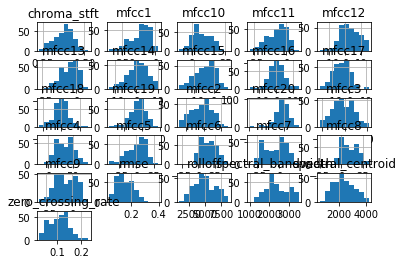

In [80]:
# Visualizamos rápidamente las caraterísticas de entrada
fd.hist()
plt.show()

Text(0.5, 1.0, 'grafico - ')

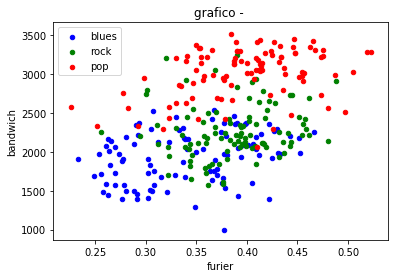

In [84]:
#Grafico chroma_stft vs spectral_bandwidth
fig = fd[fd.label == 'blues'].plot(kind='scatter', x='chroma_stft', y='spectral_bandwidth', color='blue', label='blues')
fd[fd.label == 'rock'].plot(kind='scatter', x='chroma_stft', y='spectral_bandwidth', color='green', label='rock', ax=fig)
fd[fd.label == 'pop'].plot(kind='scatter', x='chroma_stft', y='spectral_bandwidth', color='red', label='pop', ax=fig)
fig.set_xlabel('furier')
fig.set_ylabel('bandwich')
fig.set_title('grafico - ')

